In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.datasets import make_blobs

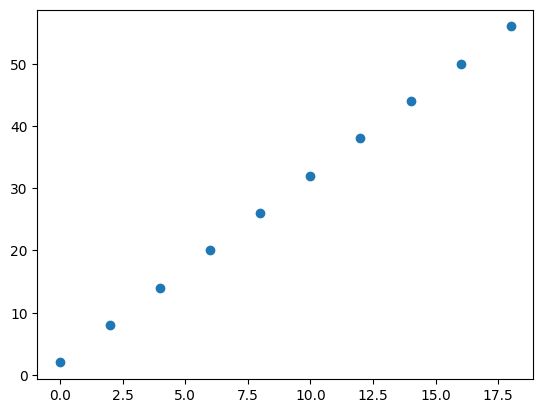

In [26]:
x = np.arange(0,20,2)
y = 2 + 3*x
plt.scatter(x, y)
plt.show()

In [3]:
model = LinearRegression()
x = x.reshape(-1,1)
y = y.reshape(-1,1)
result = model.fit(x, y)
print(result.coef_)
print(result.intercept_)

[[3.]]
[2.]


In [60]:
torch.manual_seed(42)

class SGDRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1)

    def forward(self, x):
        y = self.fc(x)
        return y

model = SGDRegression()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
EPOCHS = 5000
X_train = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(1)


In [39]:
for name, param in model.named_parameters():
    print(f"{name} -- {param}")

fc.weight -- Parameter containing:
tensor([[0.7645]], requires_grad=True)
fc.bias -- Parameter containing:
tensor([0.8300], requires_grad=True)


In [62]:
losses = []
for epoch in range(EPOCHS):
    ### PASS DATA THROUGH MODEL ###
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())
    
    ### OPTIMIZE MODEL ###
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
for name, param in model.named_parameters():
    print(name, param)

fc.weight Parameter containing:
tensor([[3.0002]], requires_grad=True)
fc.bias Parameter containing:
tensor([1.9969], requires_grad=True)


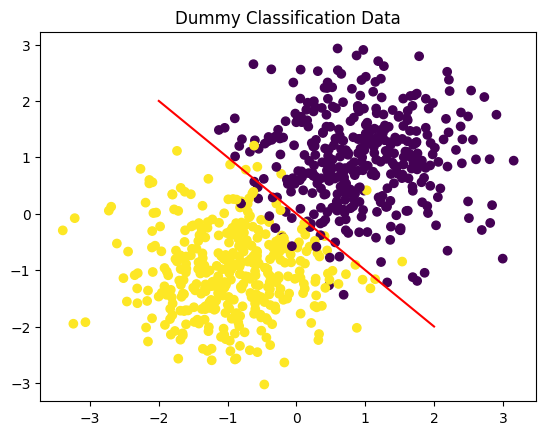

In [3]:
### Generate Blob Data ###
centers = [[1, 1], [-1, -1]]
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.8,
                            random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dummy Classification Data")
plt.plot([-2,2], [2,-2], "r")
plt.show()


### Add Dimension to y
y = y.reshape(-1,1)

In [8]:
torch.manual_seed(42)

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 1)
    
    def forward(self, x):
        y = torch.sigmoid(self.fc1(x))
        return y

model = LogisticRegression()
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
EPOCHS = 5000
X_train = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(1)


In [10]:
losses = []
for epoch in range(EPOCHS):
    ### PASS DATA THROUGH MODEL ###
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())
    
    ### OPTIMIZE MODEL ###
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[-1.2602, -1.3138]], requires_grad=True)
fc1.bias Parameter containing:
tensor([-0.0721], requires_grad=True)


In [11]:
y_final_pred = model(X_train)
accuracy = torch.sum((y_final_pred > 0.5).int() == y_train) / len(y_train)
accuracy

tensor(0.9707)